# Content:
1. [Riemann approximation](#riemann)
2. [Newton-Cotes formulae](#newton)
3. [Trapezoidal rule](#trap)
4. [Simpson's 1/3 rule](#simp13)
5. [Arbitray order Newton-Cotes with Scipy](#newtonscipy)
6. [Gaussian quadrature](#quadrature)
7. [Gauss-Legendre quadrature](#gaussleg)
8. [Gauss-Laguerre quadrature](#gausslag)
9. [Gauss-Hermite quadrature](#gaussher)

## 1. <a name="riemann">Riemann approximation</a>

![../boardwork2022-120.jpg](../boardwork/boardwork2022-120.jpg)
![../boardwork2022-121.jpg](../boardwork/boardwork2022-121.jpg)
![../boardwork2022-122.jpg](../boardwork/boardwork2022-122.jpg)

Let's test the approximation for $\int_0^\pi dx\,\sin(x)=\left[ -\cos(x)\right]^\pi_0=2$

In [1]:
import numpy as np

a = 0
b = np.pi

# Let's decide the step size using number of grids we want to use
n=100
h = (b - a)/n

print('We are taking ',n,' grids between ',a,' and ',b)
print('Step size, h = ',h)

# Function we want to integrate
def f(x):
    val = np.sin(x)
    return val

# Discretize x
x = np.linspace(a, b, n)

# Left Riemann
I_L = 0
for k in range(0,n-1):
    I_L = I_L + h * f(x[k])
    
# Right Riemann
I_R = 0
for k in range(1,n):
    I_R = I_R + h * f(x[k])
    
# Mid-point Riemann
I_mid = 0
for k in range(0,n-1):
    y_k=(x[k]+x[k+1])/2
    I_mid = I_mid + h * f(y_k)

print('Integral using left-Riemann approximation is ', I_L)
print('Integral using right-Riemann approximation is ', I_R)
print('Integral using mid-point-Riemann approximation is ', I_mid)

We are taking  100  grids between  0  and  3.141592653589793
Step size, h =  0.031415926535897934
Integral using left-Riemann approximation is  1.9798338422550528
Integral using right-Riemann approximation is  1.9798338422550528
Integral using mid-point-Riemann approximation is  1.9800830799182418


Let's see how the error decreases with step size

In [2]:
def Integrate_LRiemenn(f,a,b,n):
    h=(b-a)/n
    x = np.linspace(a, b, n)
    I_L = 0
    for k in range(0,n-1):
        I_L = I_L + h * f(x[k])
    return I_L

def Integrate_midRiemenn(f,a,b,n):
    h=(b-a)/n
    x = np.linspace(a, b, n)
    I_mid = 0
    for k in range(0,n-1):
        y_k=(x[k]+x[k+1])/2
        I_mid = I_mid + h * f(y_k)
    return I_mid

In [3]:
def f(x):
    val = np.sin(x)
    return val

In [4]:
n_steps=[2**10,2**9,2**8,2**7,2**6,2**5,2**4,2**3,2**2,2]
a=0
b=np.pi

In [5]:
steps=[]
error_I_L=[]
for n in n_steps:
    h=(b-a)/n
    steps.append(h)
    I= Integrate_LRiemenn(f,a,b,n) 
    error_I_L.append(np.abs(I-2))
    print('Integral using left-Riemann approximation for h=', h,' is ',I)

Integral using left-Riemann approximation for h= 0.0030679615757712823  is  1.9980453047349203
Integral using left-Riemann approximation for h= 0.006135923151542565  is  1.9960874627908571
Integral using left-Riemann approximation for h= 0.01227184630308513  is  1.9921623018041035
Integral using left-Riemann approximation for h= 0.02454369260617026  is  1.984273809618408
Integral using left-Riemann approximation for h= 0.04908738521234052  is  1.968342013332234
Integral using left-Riemann approximation for h= 0.09817477042468103  is  1.9358415164340417
Integral using left-Riemann approximation for h= 0.19634954084936207  is  1.868141092060096
Integral using left-Riemann approximation for h= 0.39269908169872414  is  1.7205270939201556
Integral using left-Riemann approximation for h= 0.7853981633974483  is  1.3603495231756635
Integral using left-Riemann approximation for h= 1.5707963267948966  is  0.0


In [6]:
error_I_mid=[]
for n in n_steps:
    h=(b-a)/n
    I= Integrate_midRiemenn(f,a,b,n) 
    error_I_mid.append(np.abs(I-2))
    print('Integral using mid-point-Riemann approximation  for h=', h,' is ',I)

Integral using mid-point-Riemann approximation  for h= 0.0030679615757712823  is  1.9980476601326316
Integral using mid-point-Riemann approximation  for h= 0.006135923151542565  is  1.9960968936060606
Integral using mid-point-Riemann approximation  for h= 0.01227184630308513  is  1.9922000991218507
Integral using mid-point-Riemann approximation  for h= 0.02454369260617026  is  1.984425595577799
Integral using mid-point-Riemann approximation  for h= 0.04908738521234052  is  1.968953999674898
Integral using mid-point-Riemann approximation  for h= 0.09817477042468103  is  1.9383293482526616
Integral using mid-point-Riemann approximation  for h= 0.19634954084936207  is  1.8784313354592557
Integral using mid-point-Riemann approximation  for h= 0.39269908169872414  is  1.7647736539512249
Integral using mid-point-Riemann approximation  for h= 0.7853981633974483  is  1.5707963267948968
Integral using mid-point-Riemann approximation  for h= 1.5707963267948966  is  1.5707963267948966


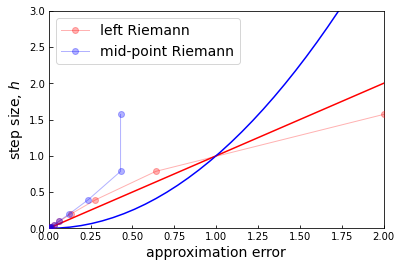

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.tick_params(direction="in",which='both')
ax.set_xlim([0,2])
ax.set_ylim([0,3])

x=np.linspace(0,np.pi)
ax.plot(error_I_L, steps,label='left Riemann',color='red',zorder=3,linewidth=1.0,marker='o',linestyle='-',alpha=0.3)
ax.plot(error_I_mid, steps,label='mid-point Riemann',color='blue',zorder=3,linewidth=1.0,marker='o',linestyle='-',alpha=0.3)
ax.plot(x,x,color='red',linestyle='-')
ax.plot(x,x**2,color='blue',linestyle='-')
ax.legend(frameon=True, loc='upper left',ncol=1,fontsize=14)

plt.xlabel('approximation error', fontsize = 14)
plt.ylabel('step size, $h$', fontsize = 14)
pass

Let's try another example

## 2. <a name="newton">Newton-Cotes formulae</a>

![../boardwork2022-123.jpg](../boardwork/boardwork2022-123.jpg)

## 3. <a name="trap">Trapezoidal rule</a>

![../boardwork2022-124.jpg](../boardwork/boardwork2022-124.jpg)
![../boardwork2022-125.jpg](../boardwork/boardwork2022-125.jpg)

In [8]:
def f(x):
    val = np.sin(x)
    return val

a=0
b=np.pi

n=1024
x = np.linspace(a, b, n)

In [9]:
import scipy.integrate

I=scipy.integrate.trapezoid(f(x),x)
print('Integral using scipy\'s trapezoidal rule is ',I)

Integral using scipy's trapezoidal rule is  1.9999984281999588


## 4. <a name="simp13">Simpson's 1/3 rule</a>

![../boardwork2022-126.jpg](../boardwork/boardwork2022-126.jpg)

In [10]:
I=scipy.integrate.simpson(f(x),x)
print('Integral using scipy\'s trapezoidal rule is ',I)

Integral using scipy's trapezoidal rule is  1.9999999999972826


## 5. <a name="newtonscipy">Arbitray-order Newton-Cotes with Scipy</a>

The integral approximations are of the form $$\int dx\, f(x)\approx \sum_{i=0}^{N} h a_i f(x_i)$$ where $h$ is the step size, and $a_i$ are weights at different positions.

In [11]:
from scipy.integrate import newton_cotes
print (newton_cotes.__doc__)


    Return weights and error coefficient for Newton-Cotes integration.

    Suppose we have (N+1) samples of f at the positions
    x_0, x_1, ..., x_N. Then an N-point Newton-Cotes formula for the
    integral between x_0 and x_N is:

    :math:`\int_{x_0}^{x_N} f(x)dx = \Delta x \sum_{i=0}^{N} a_i f(x_i)
    + B_N (\Delta x)^{N+2} f^{N+1} (\xi)`

    where :math:`\xi \in [x_0,x_N]`
    and :math:`\Delta x = \frac{x_N-x_0}{N}` is the average samples spacing.

    If the samples are equally-spaced and N is even, then the error
    term is :math:`B_N (\Delta x)^{N+3} f^{N+2}(\xi)`.

    Parameters
    ----------
    rn : int
        The integer order for equally-spaced data or the relative positions of
        the samples with the first sample at 0 and the last at N, where N+1 is
        the length of `rn`. N is the order of the Newton-Cotes integration.
    equal : int, optional
        Set to 1 to enforce equally spaced data.

    Returns
    -------
    an : ndarray
        1-D array

In [12]:
def f(x):
    val = np.sin(x)
    return val

a=0
b=np.pi

exact = 2

In [13]:
print(('Order   NumIntegral     Error           Precentage Error'))
for N in range(1,11):
    x = np.linspace(a, b, N+1)
    ak, B = newton_cotes(N, 1)
    h = (b - a) / N
    quad = h * np.sum(ak * f(x))
    error = abs(quad - exact)
    print('{:3d}  {:14.9f}     {:11.9f}     {:14.9f}'.format(N, quad, error, error/exact*100))

Order   NumIntegral     Error           Precentage Error
  1     0.000000000     2.000000000      100.000000000
  2     2.094395102     0.094395102        4.719755120
  3     2.040524285     0.040524285        2.026214238
  4     1.998570732     0.001429268        0.071463409
  5     1.999203094     0.000796906        0.039845304
  6     2.000017814     0.000017814        0.000890682
  7     2.000010866     0.000010866        0.000543277
  8     1.999999835     0.000000165        0.000008236
  9     1.999999895     0.000000105        0.000005259
 10     2.000000001     0.000000001        0.000000057


Let's look at the coefficients for some $N$ and check the answer by applying the formula, $$\int dx\, f(x)\approx \sum_{i=0}^{N} h a_i f(x_i).$$

In [14]:
def run_Newton_cotes(N):
    x = np.linspace(a, b, N+1)
    ak, B = newton_cotes(N, 1)
    h = (b - a) / N
    quad = h * np.sum(ak * f(x))
    error = abs(quad - exact)
    print('Number of points:',N+1,'\n')
    print(' Points, x_k     Weights, a_k')
    for i in range(N+1):
        print('{:11.9f}     {:11.9f}'.format(x[i],ak[i]))
    print('\n Integral:',quad)
    return h,x,ak,quad

In [15]:
N=1
h,x,ak,quad=run_Newton_cotes(N)
fk=f(x)
val=h * np.dot(ak,fk)
print(' Checking the integral:',val)

Number of points: 2 

 Points, x_k     Weights, a_k
0.000000000     0.500000000
3.141592654     0.500000000

 Integral: 1.9236706937217898e-16
 Checking the integral: 1.9236706937217898e-16


In [16]:
N=2
h,x,ak,quad=run_Newton_cotes(N)
fk=f(x)
val=h * np.dot(ak,fk)
print(' Checking the integral:',val)

Number of points: 3 

 Points, x_k     Weights, a_k
0.000000000     0.333333333
1.570796327     1.333333333
3.141592654     0.333333333

 Integral: 2.0943951023931953
 Checking the integral: 2.0943951023931953


In [17]:
N=3
h,x,ak,quad=run_Newton_cotes(N)
fk=f(x)
val=h * np.dot(ak,fk)
print(' Checking the integral:',val)

Number of points: 4 

 Points, x_k     Weights, a_k
0.000000000     0.375000000
1.047197551     1.125000000
2.094395102     1.125000000
3.141592654     0.375000000

 Integral: 2.040524284763495
 Checking the integral: 2.040524284763495


``` We can see that the coefficients correspond to Trapezoidal, Simpson-1/3, and Simpson-3/8 rules.```

## 6. <a name="quadrature">Gaussian quadrature</a>

In numerical analysis, Gaussian quadrature rule is an approximation of the definite integral of a function, usually stated as a weighted sum of function values at specified points within the domain of integration. The integration problem is stated as follows $$\int_a^b dx\, w(x) f(x)\approx \sum_{i=1}^{N} c_i f(x_i)$$

`` Note that, in the above formula, we do not have the step size, h.`` Another minor change is that $i$ starts from 1 because we want to show the summation over $N$ points.

For a given $N$ and $w(x)$, the problem now is to find not only the best set of ${c_i}$, but also the best set of _abcissae_, $x_i$, to evaluate the function value. Hence, $x_i$, may come out as non-uniformly separated.

`` Overall, there are 2N free parameters to choose. Recall that a polynomial of degree N depends on N + 1 free parameters (the coefficients). Thus 2N parameters can define a polynomial of degree 2N − 1 or less. Thus, an N-point Gaussian quadrature formula calculates integrals exactly for polynomials of order 2N − 1 or lower.``

For a given choice of the integration limit and the weight function, the best set of abscissae turn out to be roots of various polynomials. This statement can be mathematically proved.  

|Limit| $$w(x)$$  |Polynomial|
|---|---|---|
|  [-1,1] | 1   | Legendre   |
|  (-$\infty$,$\infty$) | $$\exp(-x^2)$$  | Hermite  |
|  [0,$\infty$) |  $$\exp(-x)$$ | Laguerre  |

Suppose you want to apply Quadratures for limits different than what's given in this list, then you can use the transformation formula
$$\int_a^b dx\, f(x) = \frac{b-a}{2} \int_{-1}^{+1} dt\, f \left( \frac{(b-a)t+(b+a)}{2} \right)$$

You apply Gaussian quadrature in standard limit, then transform the integral to the new limit.

## 7. <a name="gaussleg">Gauss-Legendre quadrature</a>

Let's write do 4-point Gauss-Legendre integration of $\int_0^{\pi}\,\sin(x)$, step-by-step. 

In [18]:
def f(x):
    val = np.sin(x)
    return val

a=0
b=np.pi

exact = 2

In [19]:
from scipy.special import roots_legendre, eval_legendre

N=4
x, c = roots_legendre(N)

print(' Points, x_i     Coefficients, c_i')
for i in range(N):
    print('{:11.9f}     {:11.9f}'.format(x[i],c[i]))

 Points, x_i     Coefficients, c_i
-0.861136312     0.347854845
-0.339981044     0.652145155
0.339981044     0.652145155
0.861136312     0.347854845


In [20]:
t=( (b-a)*x+(b+a) ) / 2
f_i=f(t)

Int_gaussleg=np.dot(c,f_i) * (b-a)/2
print(Int_gaussleg)

1.999984228457722


This value is more accurate than the value obtained with 4-point Newton-Cotes formula. 

Now, let's write a function to do all the steps by taking as inputs, the function to be integrated and the number of points to use. 

In [21]:
from scipy.special import roots_legendre, eval_legendre

def GaussLegendre(f,a,b,N):
    
    x, c = roots_legendre(N)
    
    t=( (b-a)*x+(b+a) ) / 2
    f_i=f(t)
    
    Int_gaussleg=np.dot(c,f_i) * (b-a)/2
    
    return Int_gaussleg

In [22]:
print(('Order   NumIntegral     Error           Precentage Error'))

for N in range(1,11):
    quad = GaussLegendre(f,0,np.pi,N)
    error = abs(quad - exact)
    print('{:3d}  {:14.9f}     {:11.9f}     {:14.9f}'.format(N, quad, error, error/exact*100))

Order   NumIntegral     Error           Precentage Error
  1     3.141592654     1.141592654       57.079632679
  2     1.935819575     0.064180425        3.209021267
  3     2.001388914     0.001388914        0.069445680
  4     1.999984228     0.000015772        0.000788577
  5     2.000000110     0.000000110        0.000005514
  6     1.999999999     0.000000001        0.000000026
  7     2.000000000     0.000000000        0.000000000
  8     2.000000000     0.000000000        0.000000000
  9     2.000000000     0.000000000        0.000000000
 10     2.000000000     0.000000000        0.000000000


_Compare these to the Newton-Cotes values_

Let's try another example $$\int_1^3dx\,\left[ x^6 - x^2 \sin(2x) \right]=317.34424667$$

In [23]:
def f(x):
    return x**6 - x**2 * np.sin(2*x)

a=1
b=3

exact = 317.34424667

print(('Order   NumIntegral     Error           Precentage Error'))

for N in range(1,7):
    quad = GaussLegendre(f,a,b,N)
    error = abs(quad - exact)
    print('{:3d}  {:14.9f}     {:11.9f}     {:14.9f}'.format(N, quad, error, error/exact*100))

Order   NumIntegral     Error           Precentage Error
  1   134.054419962     183.289826708       57.757412851
  2   306.819934496     10.524312174        3.316370876
  3   317.264151734     0.080094936        0.025239133
  4   317.345390334     0.001143664        0.000360386
  5   317.344226722     0.000019948        0.000006286
  6   317.344246890     0.000000220        0.000000069


## 8. <a name="gausslag">Gauss-Laguerre quadrature</a>

For integrating in the range $[0,\infty)$, we will use Gauss-Laguerre quadrature.

In [24]:
from scipy.special import roots_laguerre, eval_laguerre

def GaussLaguerre(f,N):
    
    x, c = roots_laguerre(N)
    
    w_x=np.exp(-x)
    f_i=f(x)/w_x
    
    Int_gausslag=np.dot(c,f_i) 
    
    return Int_gausslag

Now, let's try to find the integral $$\int_0^\infty dx\, \frac{e^{-x}}{(e^{-x}+1)^3}$$ 

The exact value is 3/8=0.375.

Note that the numerator $e^{-x}$ is the weight function $w(x)$, which is implicitly assumed in Gauss-Laguerre quadrature, see the Table given above. Also, the limit is fixed to $[0,\infty)$.

In [25]:
def f(x):
    val = np.exp(-x) / (np.exp(-x)+1)**3
    return val

exact = 3/8

print(('Order   NumIntegral     Error           Precentage Error'))

for N in range(1,11):
    quad = GaussLaguerre(f,N)
    error = abs(quad - exact)
    print('{:3d}  {:14.9f}     {:11.9f}     {:14.9f}'.format(N, quad, error, error/exact*100))

Order   NumIntegral     Error           Precentage Error
  1     0.390711805     0.015711805        4.189814648
  2     0.359171085     0.015828915        4.221044037
  3     0.374613091     0.000386909        0.103175728
  4     0.376452702     0.001452702        0.387387317
  5     0.375437573     0.000437573        0.116686106
  6     0.374952724     0.000047276        0.012607054
  7     0.374904821     0.000095179        0.025381124
  8     0.374957673     0.000042327        0.011287142
  9     0.374994112     0.000005888        0.001570018
 10     0.375005560     0.000005560        0.001482763


## 9. <a name="gaussher">Gauss-Hermite quadrature</a>

For integrating in the range $(-\infty,\infty)$, we will use Gauss-Hermite quadrature.

In [26]:
from scipy.special import roots_hermite, eval_hermite

def GaussHermite(f,N):
    
    x, c = roots_hermite(N)
    
    w_x=np.exp(-x**2)
    
    f_i=f(x)/w_x
    
    Int_gaussher=np.dot(c,f_i) 
    
    return Int_gaussher

Shall we try Gaussian integral? 

Sure, but remember that the weight function, $w(x)$, for Gauss-Hermite quadrature is $e^{-x^2}$, so the integand for quadrature is just 1.

In [27]:
def f(x):
    return np.exp(-x**2)

exact = np.sqrt(np.pi)


print(('Order   NumIntegral     Error           Precentage Error'))

for N in range(1,11):
    quad = GaussHermite(f,N)
    error = abs(quad - exact)
    print('{:3d}  {:14.9f}     {:11.9f}     {:14.9f}'.format(N, quad, error, error/exact*100))

Order   NumIntegral     Error           Precentage Error
  1     1.772453851     0.000000000        0.000000000
  2     1.772453851     0.000000000        0.000000000
  3     1.772453851     0.000000000        0.000000000
  4     1.772453851     0.000000000        0.000000000
  5     1.772453851     0.000000000        0.000000000
  6     1.772453851     0.000000000        0.000000000
  7     1.772453851     0.000000000        0.000000000
  8     1.772453851     0.000000000        0.000000000
  9     1.772453851     0.000000000        0.000000000
 10     1.772453851     0.000000000        0.000000000


Let's try another example. $$\int_{-\infty}^{\infty}dx\,x^4 \exp(-x^4)=2\int_0^{\infty}dx\,x^4 \exp(-x^4)=\Gamma(2.5)$$

In [28]:
def f(x):
    return x**4 * np.exp(-x**2)

exact = scipy.special.gamma(2.5)

print(('Order   NumIntegral     Error           Precentage Error'))

for N in range(1,11):
    quad = GaussHermite(f,N)
    error = abs(quad - exact)
    print('{:3d}  {:14.9f}     {:11.9f}     {:14.9f}'.format(N, quad, error, error/exact*100))

Order   NumIntegral     Error           Precentage Error
  1     0.000000000     1.329340388      100.000000000
  2     0.443113463     0.886226925       66.666666667
  3     1.329340388     0.000000000        0.000000000
  4     1.329340388     0.000000000        0.000000000
  5     1.329340388     0.000000000        0.000000000
  6     1.329340388     0.000000000        0.000000000
  7     1.329340388     0.000000000        0.000000000
  8     1.329340388     0.000000000        0.000000000
  9     1.329340388     0.000000000        0.000000000
 10     1.329340388     0.000000000        0.000000000


Note that essentially, we are integrating a degree-4 polynomial. Recall, that an $N$-point Gaussian quadrature formula calculates integrals exactly for polynomials of order 2$N$ − 1 or lower. 

Hence, for N=3 we have calculated the integral exactly. 

# Self-study: Integration of higher dimensional functions.

Some of the `scipy` procedures allow you to integrate a higher-dimensional function. You should consult the manuals. It is also possible for you to write your own codes for integrating a higher-dimensional function. 